In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Q1

In [52]:
data=pd.read_csv('data.csv')
data.head()

,I,Temperature(x),Yield(y)
0,1,50,3.3
1,2,50,2.8
2,3,50,2.9
3,4,70,2.3
4,5,70,2.6


#### Simple Linear Regression

In [53]:
x=np.array(data['Temperature(x)'])
y=np.array(data['Yield(y)'])
x_mean=np.mean(x)
y_mean=np.mean(y)
print('mean of x values: ',x_mean)
print('mean of y values: ',y_mean)

mean of x values:  78.0
mean of y values:  2.833333333333333


In [54]:
num=0
den=0
for i in range(len(x)):
    num+=(x[i]-x_mean)*(y[i]-y_mean)
    den+=(x[i]-x_mean)**2
b1=num/den
b0=y_mean-(b1*x_mean)
print('Intercept b0: ',b0)
print('Slope b1: ',b1)
y_pred=b0+b1*x
print(y_pred)
#sum of square of residuals
ssr=0
for i in range(len(x)):
    ssr+=(y[i]-y_pred[i])**2
rmse=np.sqrt(ssr/len(x))
print('RMSE: ',rmse)

Intercept b0:  2.306306306306306
Slope b1:  0.006756756756756758
[2.64414414 2.64414414 2.64414414 2.77927928 2.77927928 2.77927928
 2.84684685 2.84684685 2.84684685 2.91441441 2.91441441 2.91441441
 2.98198198 2.98198198 2.98198198]
RMSE:  0.36429206511905904


In [55]:
# Matrix Formulation method
X=np.vstack([np.ones_like(x),x]).T
B=np.linalg.inv(X.T@X)@(X.T@y)
B0,B1=B
# y_pred=X@B
y_pred=B0+B1*x
error=y_pred-y
mse=np.mean((y-y_pred)**2)
rmse=np.sqrt(mse)
# rmse=np.sqrt(np.mean((y-y_pred)**2))
print(f'Intercept(B0):{B0}')
print(f'Slope(B1):{B1}')
print('Error: ',error)
print(f'MSE:{mse}')
print(f'RMSE:{rmse}')

Intercept(B0):2.306306306306297
Slope(B1):0.00675675675675691
Error:  [-0.65585586 -0.15585586 -0.25585586  0.47927928  0.17927928  0.67927928
  0.34684685 -0.05315315  0.44684685 -0.08558559 -0.18558559  0.11441441
 -0.31801802 -0.51801802 -0.01801802]
MSE:0.1327087087087086
RMSE:0.3642920651190588


#### Polynomial Regression(Quadratic Regression)

In [56]:
X_poly=np.vstack([np.ones_like(x),x,x**2]).T
B_poly=np.linalg.inv(X_poly.T@X_poly)@(X_poly.T@y)
B0_poly,B1_poly,B2_poly=B_poly
y_pred_poly=B0_poly + B1_poly*x + B2_poly*(x**2)

error_poly=y_pred_poly-y
mse_poly=np.mean((y-y_pred_poly)**2)
rmse_poly=np.sqrt(mse_poly)
# rmse_poly=np.sqrt(np.mean((y-y_pred_poly)**2))


print(f'Intercept(B0):{B0_poly}')
print(f'Linear Term Coefficient (B1): {B1_poly}')
print(f'Quadratic Term Coefficient (B2): {B2_poly}')
print('Error: ',error_poly)
print(f'MSE:{mse_poly}')
print(f'RMSE:{rmse_poly}')


Intercept(B0):7.960481099654089
Linear Term Coefficient (B1): -0.15371134020614363
Quadratic Term Coefficient (B2): 0.0010756013745701898
Error:  [-0.33608247  0.16391753  0.06391753  0.17113402 -0.12886598  0.37113402
  0.04742268 -0.35257732  0.14742268 -0.16116838 -0.26116838  0.03883162
  0.04536082 -0.15463918  0.34536082]
MSE:0.04778465063001146
RMSE:0.21859700508015076


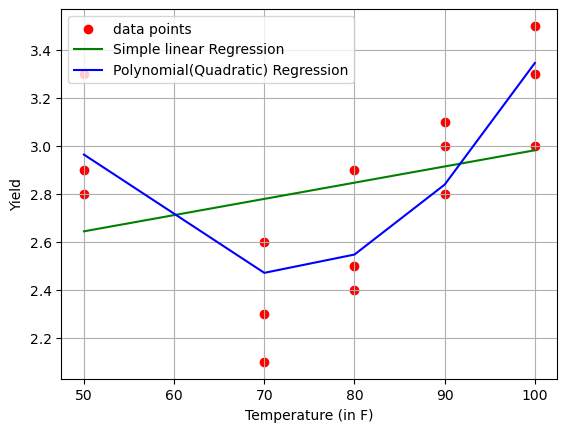

In [59]:
plt.scatter(x,y,color='red',label='data points')
plt.plot(x,y_pred,color='green',label='Simple linear Regression')
plt.plot(x,y_pred_poly,color='blue',label='Polynomial(Quadratic) Regression')
plt.xlabel('Temperature (in F)')
plt.ylabel('Yield')
plt.legend(loc=2)
plt.grid(True)
plt.show()

## Q2

In [60]:
rabbits_data=pd.read_csv('rabbits_heart_attack.csv')
rabbits_data.head()

,Infarc,Area,Group,X2,X3
0,0.119,0.34,3,0,0
1,0.190,0.64,3,0,0
2,0.395,0.76,3,0,0
3,0.469,0.83,3,0,0
4,0.130,0.73,3,0,0


In [61]:
x1=np.array(rabbits_data['Area'])
x2=np.array(rabbits_data['X2'])
x3=np.array(rabbits_data['X3'])
y=np.array(rabbits_data['Infarc'])
print(x1)
print(x2)
print(x3)
print(y)

[0.34 0.64 0.76 0.83 0.73 0.82 0.95 1.06 1.2  1.47 0.44 0.77 0.9  1.07
 1.01 1.03 1.16 1.21 1.2  1.22 0.99 0.77 1.05 1.06 1.02 0.99 0.97 1.12
 1.23 1.19 1.22 1.4 ]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
[0.119 0.19  0.395 0.469 0.13  0.311 0.418 0.48  0.687 0.847 0.062 0.122
 0.033 0.102 0.206 0.249 0.22  0.299 0.35  0.35  0.588 0.379 0.149 0.316
 0.39  0.429 0.477 0.439 0.446 0.538 0.625 0.974]


In [62]:
X_multi=np.vstack([np.ones_like(x1),x1,x2,x3]).T
B_multi=np.linalg.inv(X_multi.T@X_multi)@(X_multi.T@y)
B0_multi,B1_multi,B2_multi,B3_multi=B_multi
y_pred_multi=B0_multi + B1_multi*x1 + B2_multi*x2 + B3_multi*x3

error_multi=y_pred_multi-y
mse_multi=np.mean((y-y_pred_multi)**2)
rmse_multi=np.sqrt(mse_multi)


print(f'Intercept(B0):{B0_multi}')
print(f'Coefficient of x1: {B1_multi}')
print(f'Coefficient of x2: {B2_multi}')
print(f'Coefficient of x3: {B3_multi}')

print('Error: ',error_multi)
print(f'MSE:{mse_multi}')
print(f'RMSE:{rmse_multi}')


Intercept(B0):-0.13453637823601294
Coefficient of x1: 0.6126549752681959
Coefficient of x2: -0.2434822333958203
Coefficient of x3: -0.06565569473887112
Error:  [-0.04523369  0.06756281 -0.0639186  -0.09503275  0.18270175  0.0568407
  0.02948585  0.0348779  -0.08635041 -0.08093356 -0.17045042 -0.02827428
  0.14037087  0.17552221  0.03476291  0.00401601  0.11266116  0.06429391
  0.00716736  0.01942046 -0.35949019 -0.10744774  0.29409565  0.1332222
  0.034716   -0.02266365 -0.08291675  0.0469815   0.10737355 -0.00913265
 -0.077753   -0.31647511]
MSE:0.0170284226245642
RMSE:0.13049299837372194


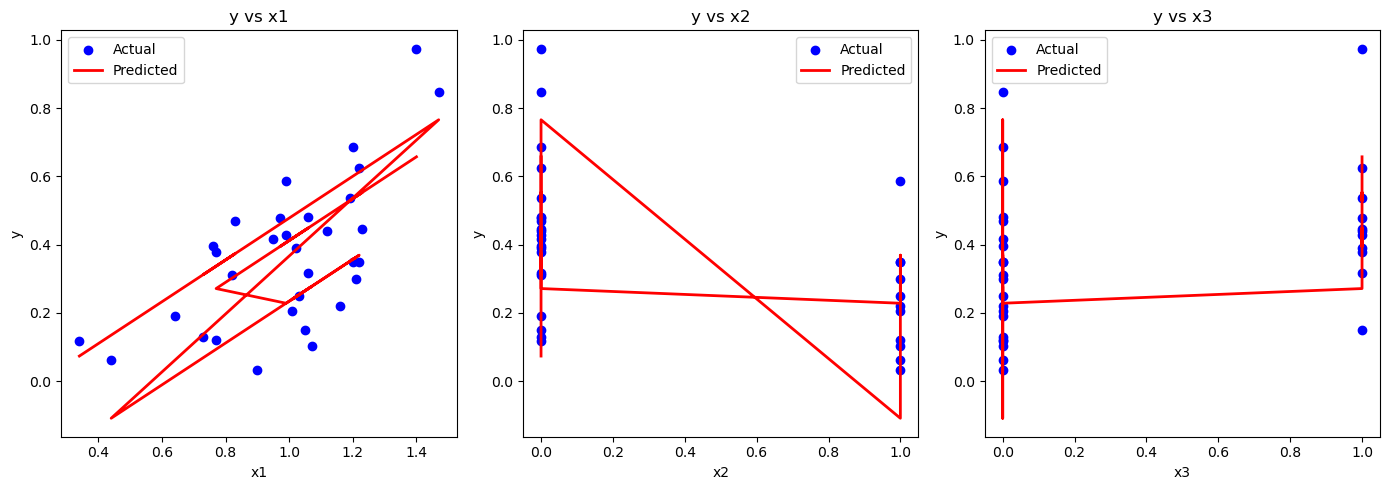

In [63]:
# Plot the relationship between y and x1
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.scatter(x1, y, color='blue', label='Actual')
plt.plot(x1, y_pred_multi, color='red', label='Predicted', linewidth=2)
plt.title('y vs x1')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()

# Plot the relationship between y and x2
plt.subplot(1, 3, 2)
plt.scatter(x2, y, color='blue', label='Actual')
plt.plot(x2, y_pred_multi, color='red', label='Predicted', linewidth=2)
plt.title('y vs x2')
plt.xlabel('x2')
plt.ylabel('y')
plt.legend()

# Plot the relationship between y and x3
plt.subplot(1, 3, 3)
plt.scatter(x3, y, color='blue', label='Actual')
plt.plot(x3, y_pred_multi, color='red', label='Predicted', linewidth=2)
plt.title('y vs x3')
plt.xlabel('x3')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()


AttributeError: 'tuple' object has no attribute 'size'

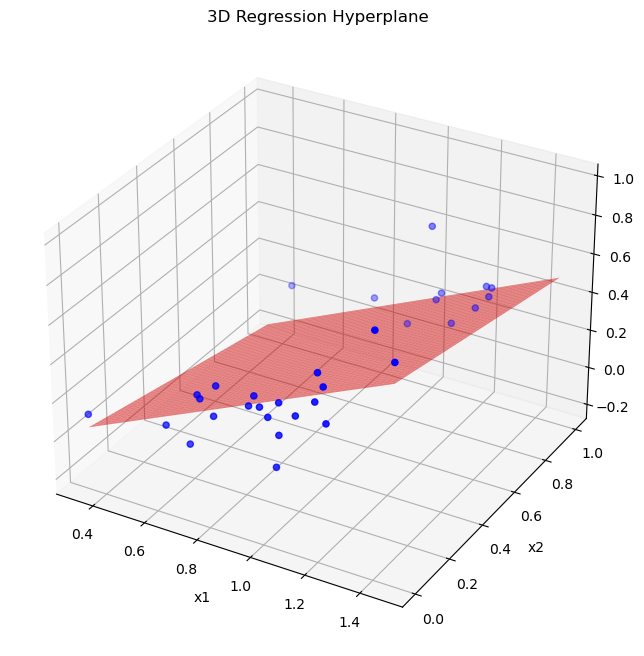

In [47]:
# exploring ways to plot all three predictor variables x1, x2, x3 /
# in one plot (hyperplane)......
from mpl_toolkits.mplot3d import Axes3D

# Create a meshgrid for x1 and x2
x1_range = np.linspace(min(x1), max(x1), 100)
x2_range = np.linspace(min(x2), max(x2), 100)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

# Compute the predicted y values over the meshgrid
y_pred_mesh = (B0_multi + B1_multi * x1_mesh + B2_multi * x2_mesh +
               B3_multi * np.mean(x3))  # Keep x3 constant at its mean

# Plotting the actual data points and the regression hyperplane
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the actual data points
ax.scatter(x1, x2, y, color='blue', label='Actual Data')

# Plot the regression hyperplane
ax.plot_surface(x1_mesh, x2_mesh, y_pred_mesh, color='red', alpha=0.5, label='Regression Hyperplane')

# Labels and title
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('3D Regression Hyperplane')

plt.legend()
plt.show()


## Additional Questions

In [2]:
import numpy as np
import pandas as pd
# from sklearn.linear_model import LinearRegression
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
#Q1
gold_data=pd.read_csv('gold.csv')
gold_data.head(10)

,Year,Price(24 karat per 10 grams)
0,2022,52950
1,2021,50045
2,2020,48651
3,2019,35220
4,2018,31438
5,2017,29667
6,2016,28623
7,2015,26343
8,2014,28006
9,2013,29600


In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Extract the features (Year) and target (Price)
X = gold_data['Year'].values.reshape(-1, 1)
y = gold_data['Price(24 karat per 10 grams)'].values

# 1. Manual calculation of the coefficients (Simple Linear Regression)
X_mean = np.mean(X)
y_mean = np.mean(y)

# Calculate the coefficients (slope and intercept)
numerator = np.sum((X - X_mean) * (y - y_mean))
denominator = np.sum((X - X_mean) ** 2)
slope_manual = numerator / denominator
intercept_manual = y_mean - slope_manual * X_mean
print('Slope (manual)= ',slope_manual)
print('Intercept (manual)= ',intercept_manual)

# 2. Sklearn model to calculate the coefficients
model = LinearRegression()
model.fit(X, y)
slope_sklearn = model.coef_[0]
intercept_sklearn = model.intercept_
print('Slope (sklearn)= ',slope_sklearn)
print('Intercept (sklearn)= ',intercept_sklearn)

# Predictions using both methods

    
y_pred_manual = slope_manual * X + intercept_manual
y_pred_sklearn = model.predict(X)
print('y (predicted manually)= ',y_pred_manual)
print('y (predicted by sklearn)= ',y_pred_sklearn)


# Calculate MSE and RMSE
mse_manual = mean_squared_error(y, y_pred_manual)
rmse_manual = np.sqrt(mse_manual)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)
print('MSE (manual)= ',mse_manual)
print('MSE (sklearn)= ',mse_sklearn)
print('RMSE (manual)= ',rmse_manual)
print('RMSE (sklearn)= ',rmse_sklearn)


# Predicting gold price for 2025
year_2025 = np.array([[2025]])
price_2025_manual = slope_manual * year_2025 + intercept_manual
price_2025_sklearn = model.predict(year_2025)
print('Price for 1 g gold in 2025 (predicted manually)= ',price_2025_manual/10)
print('Price for 1 g gold in 2025 (predicted by sklearn)= ',price_2025_sklearn/10)




Slope (manual)=  8.594443765869253e-14
Intercept (manual)=  10070.879310344657
Slope (sklearn)=  675.3436586791352
Intercept (sklearn)=  -1336226.7042665111
y (predicted manually)=  [[10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.87931034]
 [10070.

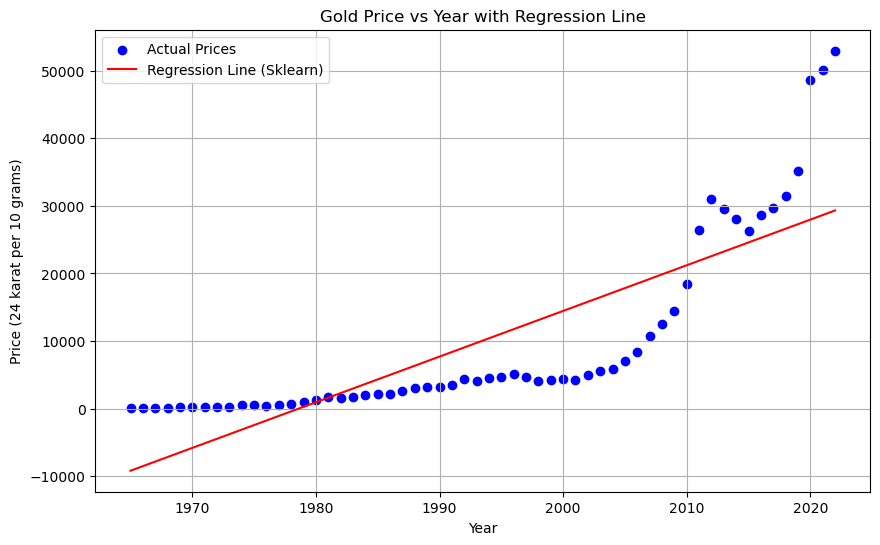

In [5]:
import matplotlib.pyplot as plt

# Plotting the data points
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Prices')

# Plotting the regression line using sklearn model
plt.plot(X, y_pred_sklearn, color='red', label='Regression Line (Sklearn)')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Price (24 karat per 10 grams)')
plt.title('Gold Price vs Year with Regression Line')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


In [7]:
#Q2
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
silver_data=pd.read_csv('silver.csv')
# Extract the features (Year) and target (Price)
X = silver_data['Year'].values.reshape(-1, 1)
y = silver_data['Silver rates in Rs./Kg.'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 1. Manual calculation of the coefficients (Simple Linear Regression)
X_train_mean = np.mean(X_train)
y_train_mean = np.mean(y_train)

# Calculate the coefficients (slope and intercept)
numerator = np.sum((X_train - X_train_mean) * (y_train - y_train_mean))
denominator = np.sum((X_train - X_train_mean) ** 2)
slope_manual = numerator / denominator
intercept_manual = y_train_mean - slope_manual * X_train_mean
print('Slope (manual)= ', slope_manual)
print('Intercept (manual)= ', intercept_manual)

# 2. Sklearn model to calculate the coefficients
model = LinearRegression()
model.fit(X_train, y_train)
slope_sklearn = model.coef_[0]
intercept_sklearn = model.intercept_
print('Slope (sklearn)= ', slope_sklearn)
print('Intercept (sklearn)= ', intercept_sklearn)

# Predictions using both methods
y_pred_manual_train = slope_manual * X_train + intercept_manual
y_pred_manual_test = slope_manual * X_test + intercept_manual
y_pred_sklearn_train = model.predict(X_train)
y_pred_sklearn_test = model.predict(X_test)
print('y (predicted manually on test set)= ', y_pred_manual_test)
print('y (predicted by sklearn on test set)= ', y_pred_sklearn_test)

# Calculate MSE and RMSE for both training and testing sets
mse_manual_train = mean_squared_error(y_train, y_pred_manual_train)
rmse_manual_train = np.sqrt(mse_manual_train)
mse_manual_test = mean_squared_error(y_test, y_pred_manual_test)
rmse_manual_test = np.sqrt(mse_manual_test)

mse_sklearn_train = mean_squared_error(y_train, y_pred_sklearn_train)
rmse_sklearn_train = np.sqrt(mse_sklearn_train)
mse_sklearn_test = mean_squared_error(y_test, y_pred_sklearn_test)
rmse_sklearn_test = np.sqrt(mse_sklearn_test)

print('Train MSE (manual)= ', mse_manual_train)
print('Test MSE (manual)= ', mse_manual_test)
print('Train MSE (sklearn)= ', mse_sklearn_train)
print('Test MSE (sklearn)= ', mse_sklearn_test)

print('Train RMSE (manual)= ', rmse_manual_train)
print('Test RMSE (manual)= ', rmse_manual_test)
print('Train RMSE (sklearn)= ', rmse_sklearn_train)
print('Test RMSE (sklearn)= ', rmse_sklearn_test)

# Predicting silver price for 2024
year_2024 = np.array([[2024]])
price_2024_manual = slope_manual * year_2024 + intercept_manual
price_2024_sklearn = model.predict(year_2024)
print('Price for 1 g silver in 2024 (predicted manually)= ', price_2024_manual / 10)
print('Price for 1 g silver in 2024 (predicted by sklearn)= ', price_2024_sklearn / 10)


Slope (manual)=  -1.408387533100321e-13
Intercept (manual)=  19388.909090909372
Slope (sklearn)=  1417.1254949164145
Intercept (sklearn)=  -2815978.6038591266
y (predicted manually on test set)=  [[19388.90909091]
 [19388.90909091]
 [19388.90909091]
 [19388.90909091]
 [19388.90909091]
 [19388.90909091]
 [19388.90909091]
 [19388.90909091]
 [19388.90909091]]
y (predicted by sklearn on test set)=  [33860.76641778 42363.51938728 29609.38993303 -2984.49645004
  5518.25651945 26775.1389432  31026.51542795  6935.38201437
 43780.6448822 ]
Train MSE (manual)=  397953116.6280992
Test MSE (manual)=  310047952.6547291
Train MSE (sklearn)=  96137363.27682272
Test MSE (sklearn)=  89984376.88193098
Train RMSE (manual)=  19948.762283111682
Test RMSE (manual)=  17608.178572888482
Train RMSE (sklearn)=  9804.966255771751
Test RMSE (sklearn)=  9486.009534147168
Price for 1 g silver in 2024 (predicted manually)=  [[1938.89090909]]
Price for 1 g silver in 2024 (predicted by sklearn)=  [5228.33978517]


Degree 1: Train MSE = 285.46, Test MSE = 301.45
Degree 2: Train MSE = 96.50, Test MSE = 102.85
Degree 3: Train MSE = 96.17, Test MSE = 103.09
Degree 4: Train MSE = 95.87, Test MSE = 104.53
Degree 5: Train MSE = 95.87, Test MSE = 104.63


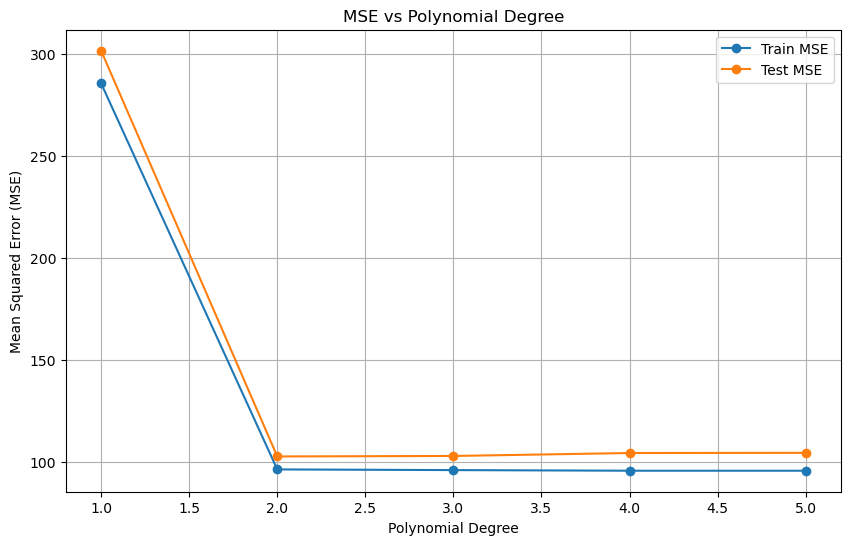

In [8]:
#Q3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assume 'X' is your independent variable and 'Y' is your dependent variable from the dataset
# For demonstration, let's create some synthetic data
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Independent variable
Y = 2 * X**2 + 3 * X + np.random.randn(100, 1) * 10  # Dependent variable with some noise

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Function to fit polynomial regression and calculate MSE
def fit_and_evaluate(degree):
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly_train = polynomial_features.fit_transform(X_train)
    X_poly_test = polynomial_features.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_poly_train, Y_train)
    
    # Predictions
    Y_train_pred = model.predict(X_poly_train)
    Y_test_pred = model.predict(X_poly_test)
    
    # Calculate MSE
    mse_train = mean_squared_error(Y_train, Y_train_pred)
    mse_test = mean_squared_error(Y_test, Y_test_pred)
    
    return mse_train, mse_test

# Evaluate models with different polynomial degrees
degrees = [1, 2, 3, 4, 5]
mse_train_values = []
mse_test_values = []

for degree in degrees:
    mse_train, mse_test = fit_and_evaluate(degree)
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)
    print(f"Degree {degree}: Train MSE = {mse_train:.2f}, Test MSE = {mse_test:.2f}")

# Plotting the MSE for different polynomial degrees
plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_train_values, label='Train MSE', marker='o')
plt.plot(degrees, mse_test_values, label='Test MSE', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()


Train MSE: 86.39
Test MSE: 67.87


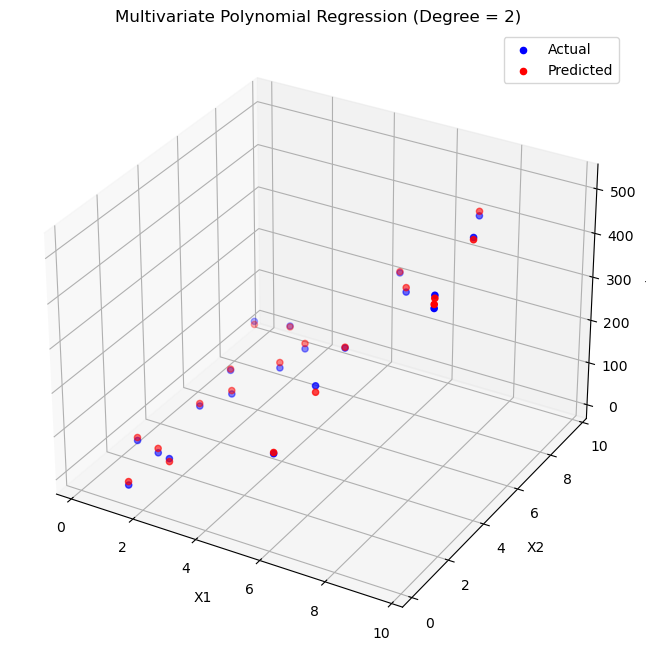

In [9]:
#Q4
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# For demonstration, let's create some synthetic data
np.random.seed(0)
X1 = np.random.rand(100, 1) * 10  # Independent variable 1
X2 = np.random.rand(100, 1) * 10  # Independent variable 2
Y = 5 * X1**2 + 3 * X2 + 2 * X1 * X2 + np.random.randn(100, 1) * 10  # Dependent variable with noise

# Combine X1 and X2 into a single dataset
X = np.hstack((X1, X2))

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Create polynomial features
degree = 2  # You can change the degree as needed
poly = PolynomialFeatures(degree=degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Fit the model
model = LinearRegression()
model.fit(X_poly_train, Y_train)

# Make predictions
Y_train_pred = model.predict(X_poly_train)
Y_test_pred = model.predict(X_poly_test)

# Evaluate the model
mse_train = mean_squared_error(Y_train, Y_train_pred)
mse_test = mean_squared_error(Y_test, Y_test_pred)

print(f"Train MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")

# Optional: Visualize the relationship (for low-dimensional cases)
# Here we'll visualize how the model fits in 3D space
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], Y_test, color='blue', label='Actual')
ax.scatter(X_test[:, 0], X_test[:, 1], Y_test_pred, color='red', label='Predicted')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Multivariate Polynomial Regression (Degree = 2)')
ax.legend()
plt.show()
